### 库导入

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### 数据读取
刚开始数据分析时，读入部分数据即可

In [2]:
path_data="E:/data/word_nlp/train_set.csv/train_set.csv"

In [63]:
#train_df=pd.read_csv(path_data,sep="\t",nrows=100000)
train_df=pd.read_csv(path_data,sep="\t",nrows=100000)

In [64]:
train_df

,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...
...,...,...
99995,3,4180 6289 6469 6122 5484 6122 2434 3017 3070 8...
99996,0,2289 307 1407 5310 4409 6286 2130 5537 2695 54...
99997,8,657 3742 307 4480 669 5393 6656 2465 4063 6248...
99998,4,1518 2935 4936 2400 4411 4462 4381 4490 7160 7...


In [65]:
train_df["text_len"]=train_df["text"].apply(lambda x:len(x.split(" ")))
train_df.describe()

,label,text_len
count,100000.000000,100000.000000
mean,3.202170,907.053450
std,3.083318,985.782311
min,0.000000,2.000000
25%,1.000000,373.000000
50%,2.000000,672.000000
75%,5.000000,1129.000000
max,13.000000,53527.000000


In [66]:
train_df["text_len"]

0        1057
1         486
2         764
3        1570
4         307
         ... 
99995    1071
99996     784
99997    1197
99998    3039
99999    1065
Name: text_len, Length: 100000, dtype: int64

Text(0.5, 1.0, 'histogram of char count')

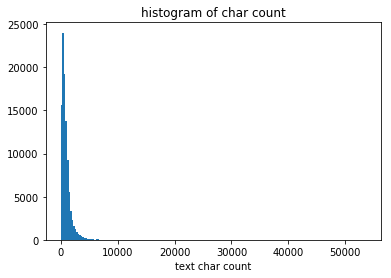

In [67]:
## bins一共有几条线状图
_=plt.hist(train_df["text_len"],bins=200)
plt.xlabel("text char count")
plt.title("histogram of char count")

### 新闻类别分布

Text(0.5, 0, 'category')

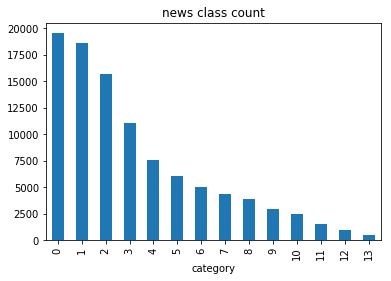

In [68]:
train_df["label"].value_counts().plot(kind="bar")
plt.title("news class count")
plt.xlabel("category")

### 字符分布统计

In [37]:
### 就这样子计算会导致list过大，导致卡死电脑..

from collections import Counter
all_lines=" ".join(list(train_df["text"]))
word_count=Counter(all_lines.split(" "))
word_count=sorted(word_count.items(),key=lambda d:d[1],reverse=True)

In [69]:
from collections import Counter

In [70]:
len(train_df)
chunk_size=50000## 一个批多少个样本
num=int(len(train_df)/chunk_size)
counter_all=Counter()
for i in range(num):
    #print(len(train_df[i:i*chunk_size]))
    all_lines=" ".join(list(train_df[i:i*chunk_size]["text"]))
    counter=Counter(all_lines.split(" "))
    #print(counter)
    counter_all+=counter
#counter_all
word_count=sorted(counter_all.items(),key=lambda d:d[1],reverse=True)

出现次数最多的字符可能是标点符号

In [72]:
type(word_count)
word_count[0:6]

[('3750', 1863731),
 ('648', 1225624),
 ('900', 810223),
 ('3370', 500505),
 ('6122', 397222),
 ('4464', 384635)]

这里我们想找到，文本中是否存在着标点符号。对每句话做字符去重，可以最大限度地去除常用字带来的影响。

In [11]:
train_df["text_unique"]=train_df["text"].apply(lambda x:" ".join(list(set(x.split(" ")))))
all_lines=" ".join(list(train_df["text_unique"]))
word_count=Counter(all_lines.split(" "))
word_count=sorted(word_count.items(),key=lambda d:int(d[1]),reverse=True)


分块计算

In [73]:
len(train_df)
chunk_size=50000## 一个批多少个样本
num=int(len(train_df)/chunk_size)

train_df["text_unique"]=train_df["text"].apply(lambda x:" ".join(list(set(x.split(" ")))))
all_lines=" ".join(list(train_df["text_unique"]))
word_count=Counter(all_lines.split(" "))
word_count=sorted(word_count.items(),key=lambda d:int(d[1]),reverse=True)



counter_all=Counter()
for i in range(num):
    #print(len(train_df[i:i*chunk_size]))
    #all_lines=" ".join(list(train_df[i:i*chunk_size]["text"]))
    all_lines=" ".join(list(train_df["text_unique"]))
    counter=Counter(all_lines.split(" "))
    counter_all+=counter
#counter_all
word_count=sorted(counter_all.items(),key=lambda d:int(d[1]),reverse=True)

In [75]:
word_count[0:6]

[('3750', 198006),
 ('900', 197702),
 ('648', 191996),
 ('2465', 176976),
 ('6122', 176406),
 ('7399', 176172)]